In [295]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# # suppress NumPy arrays scientific notation and round decimals to three places
np.set_printoptions(suppress=True)
np.printoptions(precision=3, suppress=True)

In [296]:
df = pd.read_csv('data.txt', delim_whitespace=True, encoding='ISO-8859-1')
df.head()

,Sr._No.,Spindle_speed(rpm),Feed_rate(mm/rev),Depth_of_cut(mm),MRR(mm3/min),Ra(µm)
0,1,280,0.0508,0.4,306.67,0.36
1,2,280,0.0508,0.8,609.76,0.47
2,3,280,0.0508,1.2,909.28,0.52
3,4,280,0.1016,0.4,582.94,0.80
4,5,280,0.1016,0.8,1158.73,0.90


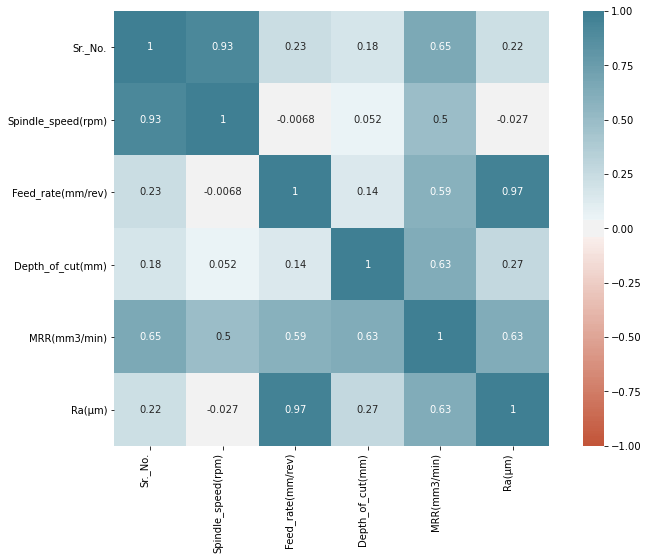

In [297]:
# visual correlation of raw data
heatMap = df
plt.figure(figsize=(12, 8))
corr = heatMap.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right')  # ;
plt.savefig('heat_map')

In [298]:
df = pd.read_csv('data.txt', delim_whitespace=True, encoding='ISO-8859-1')
df.drop(columns=['Sr._No.'], inplace=True)
x = df.iloc[:, 3:5].values
y = df.iloc[:, :-2].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)


In [299]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
y_train_pred = dtr.predict(x_train)
y_test_pred = dtr.predict(x_test)

print('R^2 train: %.3f, test: %.3f' %
      (r2_score(y_train, y_train_pred),
       r2_score(y_test, y_test_pred)))

R^2 train: 1.000, test: -0.753


In [300]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
y_train_pred = rfr.predict(x_train)
y_test_pred = rfr.predict(x_test)

print('R^2 train: %.3f, test: %.3f' %
      (r2_score(y_train, y_train_pred),
       r2_score(y_test, y_test_pred)))

R^2 train: 0.911, test: -0.395


In [301]:
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)

print('R^2 train: %.3f, test: %.3f' %
      (r2_score(y_train, y_train_pred),
       r2_score(y_test, y_test_pred)))

R^2 train: 0.450, test: -0.990


In [302]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print('R^2 train: %.3f, test: %.3f' %
      (r2_score(y_train, y_train_pred),
       r2_score(y_test, y_test_pred)))

R^2 train: 0.649, test: -0.055


LinearRegression does not have many parameters, yes. I saw you've specified them already. There are many other ways to improve a model. Look into ensemble algorithms - BaggingRegressor or Stacking, Voting ensemble examples. – Vaidøtas I. Feb 28 at 15:40